# PHAS1240 Session 5:
# Fitting data with a least-squares fit

Fahad Chohan
Last updated: 02/11/15

####In this session I am using data from PhD research done by Konstantinos Konstantinou and am using it to firstly plot a graph and then finding the line of best fit by method of least-squares fit.

I have imported numpy and matplotlib. 
Alos the "%matplotlib inline" function is a command which keeps the data plots in  the same notebook and not a new pop-up

In [1]:
#Importing NumPy
import numpy as np

#Importing matplotlib
import matplotlib.pyplot as plt

#Keeping matplotlib inside notebook
%matplotlib inline

##Data import

I am importing data for the Mean Square Displacement data for Na ions in soda lime silicate glass from a csv file and am unpacking into a set for x and y.

In [2]:
#Importing data from file and unpacking. 
#Also delimiter had to be set to ',' so it recognises that the data is seperated by a comma.
ST, MSD = np.loadtxt("Session5data.csv", unpack=True, delimiter=',') 

#Displaying the data for x and y values
print "Simulation Time (10^-12 s): ", ST
print "Mean Square Displacement (10^-20 m^2): ", MSD

Simulation Time (10^-12 s):  [ 30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.]
Mean Square Displacement (10^-20 m^2):  [ 66.97733153  69.00393687  71.02691592  73.04670438  75.06715793
  77.08458775  79.10092977  81.11463975  83.12702433  85.13417612
  87.1357832 ]


##Graph

Data is put into one graph with line of best fit. First I have added a grid. Then i have added the plots. Then I have labelled the axis and added a title. Finally I have exported my graph to a png and pdf file because it can then be printed and resized as prefered.

In [3]:
#Length of array, n
n = len(ST)

#Redfining array
x_i = ST
y_i = MSD

#Finding average
x_bar = np.mean(ST)
y_bar = np.mean(MSD)

#Finding value for slope and intercept from given equations
suma = np.sum((x_i - x_bar) * y_i)
sumb = np.sum((x_i - x_bar)**2)
m = suma / sumb
c = y_bar - m * x_bar

#Printing value for slope and intercept to correct sig fig with units
print "Slope: {0:0.3f}".format(m), " 10^-12 m^2 s^-1"
print "Intercept: {0:0.2f}".format(c), "10^-20 m^2"

#Calculating errors
d_i = y_i - m * x_i - c
m_delta = ((1/sumb) * (np.sum((d_i)**2))/(n - 2))**0.5
c_delta = (((1/n) + ((x_bar)**2)/sumb) * (np.sum((d_i)**2))/(n - 2))**0.5

#Printing errors
print "Error in Slope: {0:0.3f}".format(m_delta), " 10^-12 m^2 s^-1"
print "Error in Intercept: {0:0.2f}".format(c_delta), "10^-20 m^2"

#Printing equation of line
print "y = {0:0.3f}x + {1:0.2f}".format(m,c)

#Printing value and error for D
print "Diffusion Coefficient (D): {0:0.4f}".format(m/6), " 10^-12 m^2 s^-1"
print "Error in Diffusion Coefficient: {0:0.4f}".format(m_delta / 6), " 10^-12 m^2 s^-1"

Slope: 2.016  10^-12 m^2 s^-1
Intercept: 6.51 10^-20 m^2
Error in Slope: 0.001  10^-12 m^2 s^-1
Error in Intercept: 0.04 10^-20 m^2
y = 2.016x + 6.51
Diffusion Coefficient (D): 0.3360  10^-12 m^2 s^-1
Error in Diffusion Coefficient: 0.0002  10^-12 m^2 s^-1


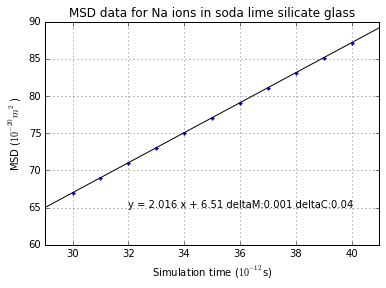

In [4]:
#Adding grid lines
plt.grid(True)

#Adding graph x limit
plt.xlim(29,41)

#Using 2 calculated points from my equation to fit line of best fit
x_1 = 29
x_2 = 41

#Making an array for the two points so they can later be plotted on graph as line
p = np.array([x_1,x_2])
q = np.array([m * x_1 + c,m * x_2 + c])

#Plotting the data as points and selecting in what format the data is presented (just data points).
plt.plot(ST,MSD,'b.')

#Plotting line of best fit from above array
plt.plot(p,q,'k')

#Printing the equation of line as text and in the correct amount of sig fig using formatting
plt.text(32, 65, "y = {0:0.3f} x + {1:0.2f} deltaM:{2:0.3f} deltaC:{3:0.2f}".format(m,c,m_delta,c_delta))

#Naming axis and title
plt.xlabel('Simulation time ($10^{-12}$s)')
plt.ylabel('MSD ($10^{-20} m^2$)')
plt.title('MSD data for Na ions in soda lime silicate glass')

#Exporting graph to pdf and png
plt.savefig('Fahad Chohan Session 5 plot.pdf')
plt.savefig('Fahad Chohan Session 5 plot.png')